In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [4]:
#Load your DataFrames
jan2020 = pd.read_csv('./filtered_simba/2020 Jan-June_filtered.csv')
feb2021 = pd.read_csv('./filtered_simba/2021 Jan-June_filtered.csv')
june22 = pd.read_csv('./filtered_simba/2022 Jan-June_filtered.csv')
july22 = pd.read_csv('./filtered_simba/2022 Jul-Dec_filtered.csv')
june23 = pd.read_csv('./filtered_simba/2023_filtered.csv')
july23 = pd.read_csv('./filtered_simba/2023_filtered.csv')

#Prepare sets of columns for comparison
cols_jan2020 = set(jan2020.columns)
cols_feb2021 = set(feb2021.columns)
cols_june22 = set(june22.columns)
cols_july22 = set(july22.columns)
cols_june23 = set(june23.columns)
cols_july23 = set(july23.columns)

# List of column sets for easy comparison
column_sets = [cols_jan2020, cols_feb2021, cols_june22, cols_july22, cols_june23, cols_july23]


In [5]:
# Find the intersection of all columns (common columns)
common_columns = set.intersection(*column_sets)
print(f"Common columns across all DataFrames:\n{common_columns}\n")

# Find unique columns in each DataFrame
for i, cols in enumerate(column_sets):
    unique_cols = cols - common_columns
    if unique_cols:
        print(f"Unique columns in DataFrame {i + 1}:\n{unique_cols}\n")
    else:
        print(f"DataFrame {i + 1} has no unique columns.\n")


Common columns across all DataFrames:
{'VEHICLE_TAX', 'PRL', 'CUSTOMSVALUE', 'IMPORT_DUTY', 'COUNTRYOFORIGIN', 'BIF', 'VAT_RATE', 'MONTH_', 'IMPORT_VAT', 'HS_CHAPTER', 'DUTY_RATE', 'TAX_PAYABLE', 'YEAR', 'FOB', 'TAX_REMITTED', 'FOBCURRENCYCODE', 'REGIME', 'COUNTRYOFDESTINATION', 'HSCODE', 'REGDATE', 'QUANTITY', 'CPC', 'PORT_OF_DISCHARGE', 'PDL', 'EXCISE_RATE', 'OTHER_TAX', 'CIF_VALUE', 'ENTRYSTATUS', 'ENTRY_NUMBER', 'ITEM_NO', 'RML', 'EXCISE', 'DESCRIPTION'}

DataFrame 1 has no unique columns.

DataFrame 2 has no unique columns.

DataFrame 3 has no unique columns.

DataFrame 4 has no unique columns.

DataFrame 5 has no unique columns.

DataFrame 6 has no unique columns.



In [6]:
dataframes = [jan2020, feb2021, june22, july22, june23, july23]

# Column indices you want to clean and convert to float
columns_of_interest = [9, 10, 12, 22, 23, 24, 25, 28, 29, 32]

# Function to clean and convert data to float using regular expressions
def clean_and_convert(value):
    if isinstance(value, float):  # If it's already a float, return it as is
        return value
    # Remove any non-numeric characters except for '.' (for decimals)
    cleaned_value = re.sub(r'[^\d.]', '', value)
    
    # Remove commas (if they exist after numbers)
    cleaned_value = cleaned_value.replace(',', '')

    # Convert to float if possible, else return NaN
    try:
        return float(cleaned_value)
    except ValueError:
        return np.nan

# Loop through each DataFrame and clean/convert the specified columns
for i, df in enumerate(dataframes):
    for col_index in columns_of_interest:
        if col_index < df.shape[1]:  # Check if column index is within bounds
            if not pd.api.types.is_float_dtype(df.iloc[:, col_index]):  # Check if the column is not already float
                try:
                    # Apply the cleaning and conversion function
                    df.iloc[:, col_index] = df.iloc[:, col_index].apply(clean_and_convert)
                except Exception as e:
                    # Print the error, DataFrame index, and column index
                    print(f"Error converting column {col_index} in DataFrame {i+1}: {e}")
        else:
            print(f"Column {col_index} is out-of-bounds in DataFrame {i+1}.")
    print(f"Processed DataFrame {i+1}.")

Error converting column 12 in DataFrame 1: expected string or bytes-like object, got 'int'
Processed DataFrame 1.
Error converting column 12 in DataFrame 2: expected string or bytes-like object, got 'int'
Processed DataFrame 2.
Error converting column 12 in DataFrame 3: expected string or bytes-like object, got 'int'
Processed DataFrame 3.
Error converting column 12 in DataFrame 4: expected string or bytes-like object, got 'int'
Processed DataFrame 4.
Error converting column 12 in DataFrame 5: expected string or bytes-like object, got 'int'
Error converting column 28 in DataFrame 5: expected string or bytes-like object, got 'int'
Error converting column 29 in DataFrame 5: expected string or bytes-like object, got 'int'
Processed DataFrame 5.
Error converting column 12 in DataFrame 6: expected string or bytes-like object, got 'int'
Error converting column 28 in DataFrame 6: expected string or bytes-like object, got 'int'
Error converting column 29 in DataFrame 6: expected string or byte

/tmp/ipykernel_532183/1903567206.py:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, col_index] = df.iloc[:, col_index].apply(clean_and_convert)


In [7]:
# Loop through each DataFrame to inspect the data types of the specified columns
for i, df in enumerate(dataframes):
    print(f"\nDataFrame {i+1} info:")
    df.iloc[:, columns_of_interest].info()



DataFrame 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COUNTRYOFDESTINATION  0 non-null      float64
 1   PORT_OF_DISCHARGE     0 non-null      float64
 2   HSCODE                3772 non-null   int64  
 3   DUTY_RATE             2594 non-null   float64
 4   EXCISE_RATE           2594 non-null   float64
 5   VAT_RATE              2594 non-null   float64
 6   BIF                   506 non-null    float64
 7   PRL                   2594 non-null   float64
 8   PDL                   2594 non-null   float64
 9   TAX_REMITTED          2258 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 294.8 KB

DataFrame 2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                ------

In [8]:
# Extract columns from each DataFrame
cols_jan2020 = set(jan2020.columns)
cols_feb2021 = set(feb2021.columns)
cols_june22 = set(june22.columns)
cols_july22 = set(july22.columns)
cols_june23 = set(june23.columns)
cols_july23 = set(july23.columns)

# List of column sets for easy comparison
column_sets = [cols_jan2020, cols_feb2021, cols_june22, cols_july22, cols_june23, cols_july23]

# Find the intersection of all columns (common columns)
common_columns = set.intersection(*column_sets)
print(f"Common columns across all DataFrames:\n{common_columns}\n")

# Find unique columns in each DataFrame
for i, cols in enumerate(column_sets):
    unique_cols = cols - common_columns
    if unique_cols:
        print(f"Unique columns in DataFrame {i + 1}:\n{unique_cols}\n")
    else:
        print(f"DataFrame {i + 1} has no unique columns.\n")


Common columns across all DataFrames:
{'VEHICLE_TAX', 'PRL', 'CUSTOMSVALUE', 'IMPORT_DUTY', 'COUNTRYOFORIGIN', 'BIF', 'VAT_RATE', 'MONTH_', 'IMPORT_VAT', 'HS_CHAPTER', 'DUTY_RATE', 'TAX_PAYABLE', 'YEAR', 'FOB', 'TAX_REMITTED', 'FOBCURRENCYCODE', 'REGIME', 'COUNTRYOFDESTINATION', 'HSCODE', 'REGDATE', 'QUANTITY', 'CPC', 'PORT_OF_DISCHARGE', 'PDL', 'EXCISE_RATE', 'OTHER_TAX', 'CIF_VALUE', 'ENTRYSTATUS', 'ENTRY_NUMBER', 'ITEM_NO', 'RML', 'EXCISE', 'DESCRIPTION'}

DataFrame 1 has no unique columns.

DataFrame 2 has no unique columns.

DataFrame 3 has no unique columns.

DataFrame 4 has no unique columns.

DataFrame 5 has no unique columns.

DataFrame 6 has no unique columns.



In [9]:
# combined_df = pd.concat([jan2020, feb2021, june22, july22, june23, july23], ignore_index=True)

# # Save the combined DataFrame to a CSV file
# combined_df.to_csv('comb_icms.csv', index=False)

# print("Combined DataFrame has been saved as 'comb_icms.csv'.")

In [10]:
# simbjan20 = pd.read_csv('./filtered_simba/2020 Jan-June_filtered.csv')
# simbjuly20 = pd.read_csv('./filtered_simba/2020 Jul-Dec_filtered.csv')
# simbjan21 = pd.read_csv('./filtered_simba/2021 Jan-June_filtered.csv')
# simbjuly21 = pd.read_csv('./filtered_simba/2021 Jul-Dec_filtered.csv')
# simbjan22 = pd.read_csv('./filtered_simba/2022 Jan-June_filtered.csv')
# simbjuly22 = pd.read_csv('./filtered_simba/2022 Jul-Dec_filtered.csv')
# simb23 = pd.read_csv('./filtered_simba/2023_filtered.csv')

In [11]:
# Extract columns from each DataFrame
# cols_simbjan20 = set(simbjan20.columns)
# cols_simbjuly20 = set(simbjuly20.columns)
# cols_simbjan21 = set(simbjan21.columns)
# cols_simbjuly21 = set(simbjuly21.columns)
# cols_simbjan22 = set(simbjan22.columns)
# cols_simbjuly22 = set(simbjuly22.columns)
# cols_simb23 = set(simb23.columns)

# # List of column sets for easy comparison
# column_sets = [cols_simbjan20, cols_simbjuly20, cols_simbjan21, cols_simbjuly21, cols_simbjan22, cols_simbjuly22, cols_simb23]

# # Find the intersection of all columns (common columns)
# common_columns = set.intersection(*column_sets)
# print(f"Common columns across all Simba DataFrames:\n{common_columns}\n")

# # Find unique columns in each DataFrame
# for i, cols in enumerate(column_sets):
#     unique_cols = cols - common_columns
#     if unique_cols:
#         print(f"Unique columns in Simba DataFrame {i + 1}:\n{unique_cols}\n")
#     else:
#         print(f"Simba DataFrame {i + 1} has no unique columns.\n")


In [12]:
# If all columns are the same, combine the DataFrames
# if all(cols == cols_simbjan20 for cols in column_sets):
#     combined_simba_df = pd.concat([simbjan20, simbjuly20, simbjan21, simbjuly21, simbjan22, simbjuly22, simb23], ignore_index=True)
#     print("All columns are the same. DataFrames combined.")
# else:
#     print("Columns are not the same. Cannot combine DataFrames directly.")


In [13]:
# Save the combined DataFrame to a CSV file if they were combined
# if 'combined_simba_df' in locals():
#     combined_simba_df.to_csv('./final_data/comb_simba.csv', index=False)
#     print("Combined Simba DataFrame has been saved as 'comb_simba.csv'.")


In [14]:
#loading the datasets
# icms = pd.read_csv('./final_data/comb_icms.csv')
simba = pd.read_csv('./final_data/comb_simba.csv')
exports = pd.read_csv('./final_data/dom_exports.csv')


In [3]:
# icms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18563 entries, 0 to 18562
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   YEAR                    18563 non-null  int64 
 1   MONTH                   18563 non-null  object
 2   ENTRY_NUMBER            18563 non-null  object
 3   VERSION                 18563 non-null  int64 
 4   ITEM_NUM                18563 non-null  int64 
 5   ENTRYSTATUS             18563 non-null  object
 6   REG_DATE                18563 non-null  object
 7   REGIME                  18563 non-null  object
 8   CPC                     18563 non-null  object
 9   QUANTITY                18563 non-null  object
 10  FOB_VALUE               18563 non-null  object
 11  CURRENCY                18563 non-null  object
 12  ENTRY_CUSTOM_VALUE      18563 non-null  object
 13  HS_CHAPTER              18563 non-null  int64 
 14  HSCODE                  18563 non-null  int64 
 15  GO

In [15]:
standardized_columns = {
    'year': 'year',
    'month': 'month',
    'month_': 'month',
    'entry_number': 'entry_number',
    'version': 'version',
    'item_no': 'item_no',
    'item_num': 'item_no',
    'entrystatus': 'entrystatus',
    'regdate': 'regdate',
    'reg_date': 'regdate',
    'regime': 'regime',
    'cpc': 'cpc',
    'countryoforigin': 'countryoforigin',
    'origin_country_code': 'countryoforigin',
    'origin_country_name': 'origin_country_name',
    'countryofdestination': 'countryofdestination',
    'country_of_destination': 'countryofdestination',
    'port_of_discharge': 'port_of_discharge',
    'place_of_discharge': 'port_of_discharge',
    'hs_chapter': 'hs_chapter',
    'hscode': 'hscode',
    'description': 'description',
    'good_description': 'description',
    'quantity': 'quantity',
    'fob': 'fob_value',
    'fob_value': 'fob_value',
    'fobcurrencycode': 'currency',
    'currency': 'currency',
    'customsvalue': 'entry_custom_value',
    'entry_custom_value': 'entry_custom_value',
    'import_duty': 'import_duty',
    'import_vat': 'import_vat',
    'excise': 'excise',
    'vat_rate': 'vat_rate',
    'excise_rate': 'excise_rate',
    'duty_rate': 'duty_rate',
    'tax_payable': 'total_tax_payable',
    'total_tax_payable': 'total_tax_payable',
    'tax_remitted': 'total_tax_paid',
    'total_tax_paid': 'total_tax_paid',
    'rml': 'rml',
    'prl': 'prl',
    'other_tax': 'other_tax',
}

# Function to rename columns
def rename(df, col_map):
    # Lowercase the columns in the DataFrame
    df.columns = df.columns.str.lower().str.strip()
    # Rename the columns using the mapping dictionary
    df.rename(columns=col_map, inplace=True)
    return df

copy_simba = simba.copy()
# copy_icms = filtered_icms.copy()

# Exploratory Data Analysis

## Imports Data
Lets begin with imports data.

# Univariate

In [3]:
# copy_simba[copy_simba['FOB'].apply(clean_and_convert)]
gp_simba = pd.read_csv('./final_data/cleaned_comb_simba.csv')

gp_simba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  12656 non-null  int64  
 1   month_                12656 non-null  object 
 2   entry_number          12656 non-null  object 
 3   entrystatus           12656 non-null  object 
 4   item_no               12656 non-null  int64  
 5   regdate               10335 non-null  object 
 6   regime                12656 non-null  object 
 7   cpc                   12656 non-null  object 
 8   countryoforigin       12656 non-null  object 
 9   countryofdestination  3578 non-null   object 
 10  port_of_discharge     12656 non-null  object 
 11  hs_chapter            12656 non-null  int64  
 12  hscode                12656 non-null  int64  
 13  description           12656 non-null  object 
 14  quantity              12656 non-null  object 
 15  fob                

In [8]:
gp_icms = pd.read_csv('./final_data/cleaned_comb_icms.csv')

gp_simba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  12656 non-null  int64  
 1   month_                12656 non-null  object 
 2   entry_number          12656 non-null  object 
 3   entrystatus           12656 non-null  object 
 4   item_no               12656 non-null  int64  
 5   regdate               10335 non-null  object 
 6   regime                12656 non-null  object 
 7   cpc                   12656 non-null  object 
 8   countryoforigin       12656 non-null  object 
 9   countryofdestination  3578 non-null   object 
 10  port_of_discharge     12656 non-null  object 
 11  hs_chapter            12656 non-null  int64  
 12  hscode                12656 non-null  int64  
 13  description           12656 non-null  object 
 14  quantity              12656 non-null  object 
 15  fob                

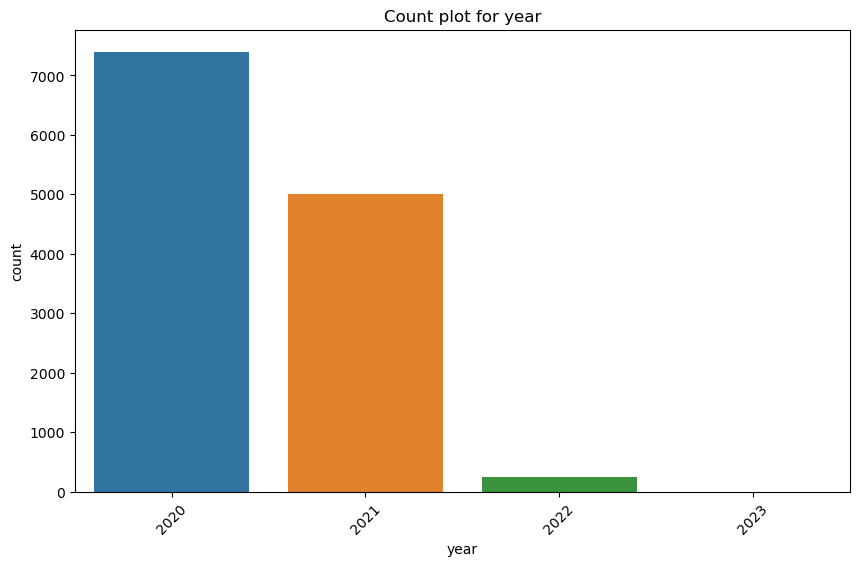

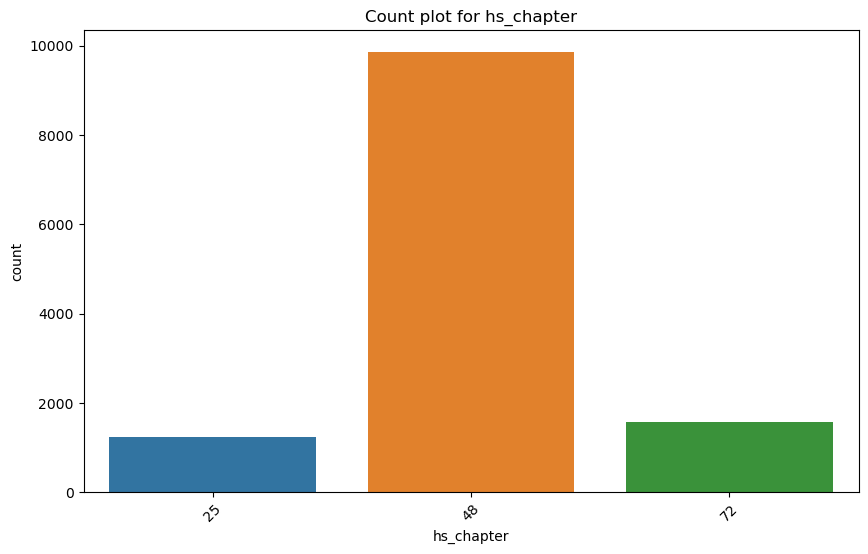

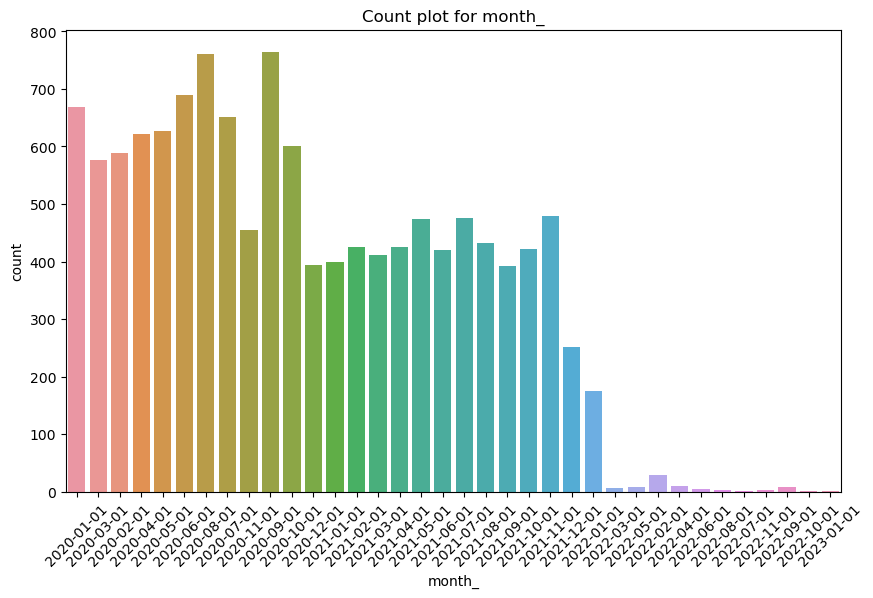

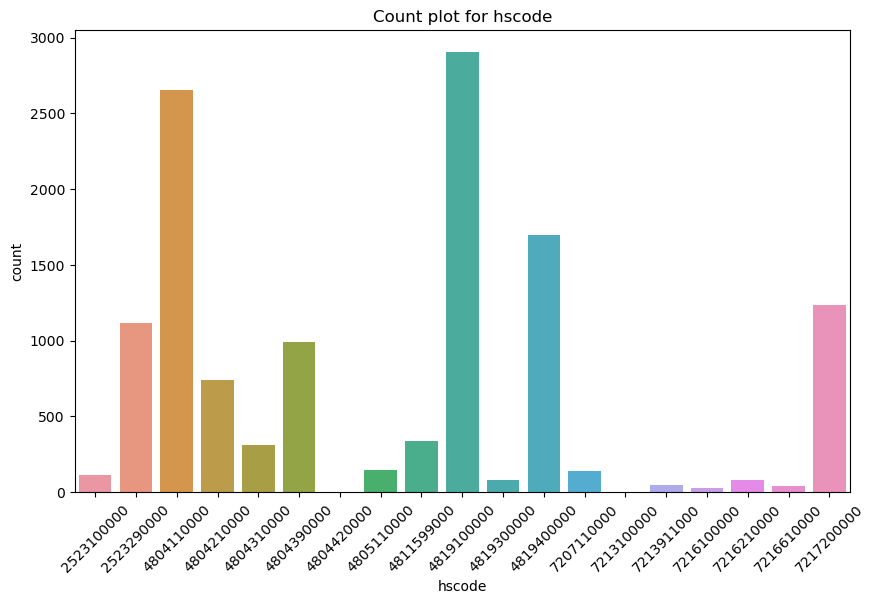

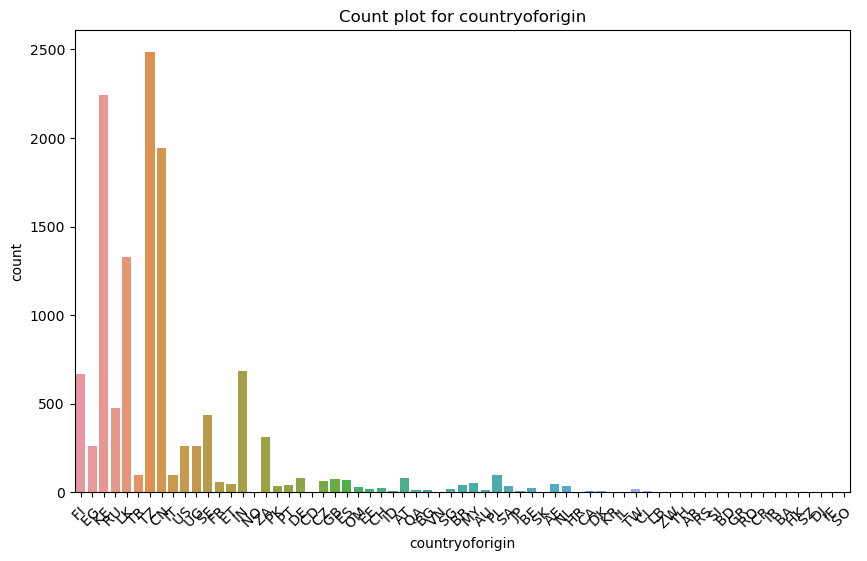

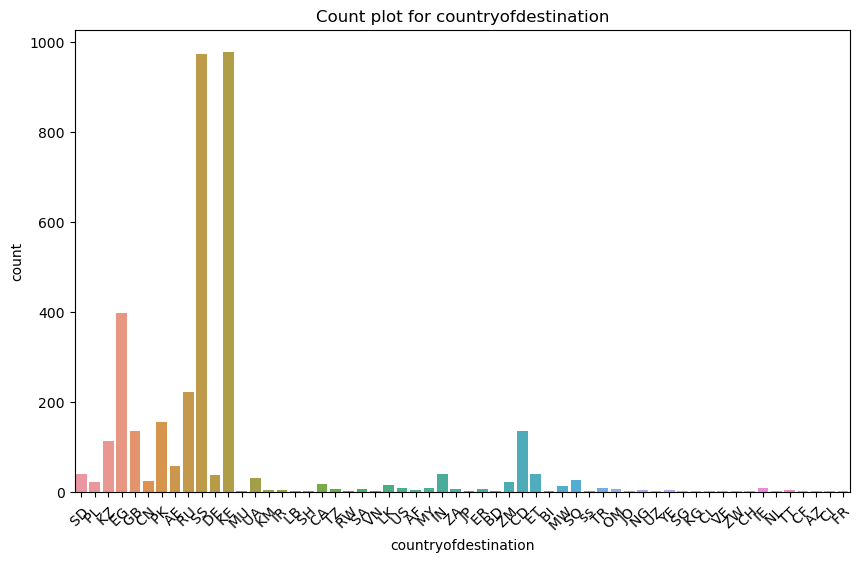

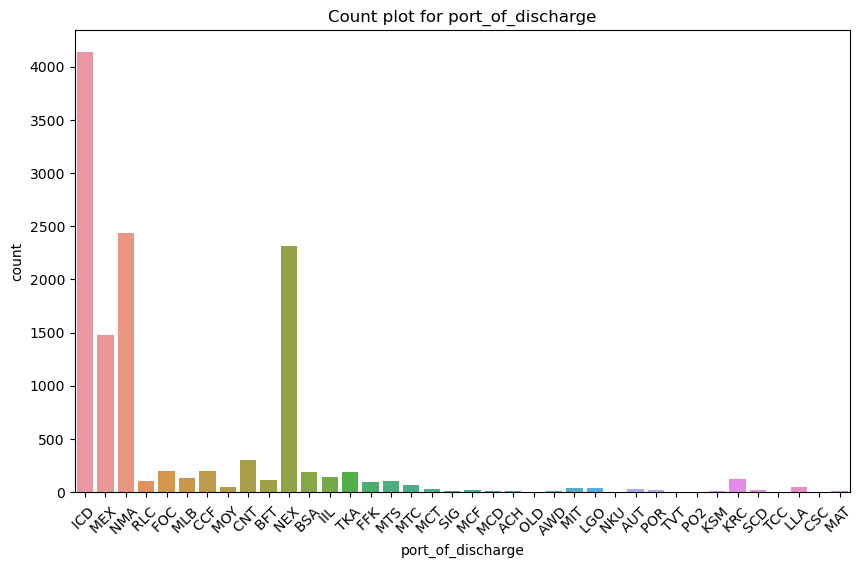

In [11]:
columns = ['year', 'hs_chapter', 'month_', 'hscode', 'countryoforigin', 
            'countryofdestination', 'port_of_discharge'
           ]

for col in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=gp_simba)
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate
Combining two columns to see how they relate to each other.

In [15]:
gp_simba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  12656 non-null  int64  
 1   month_                12656 non-null  object 
 2   entry_number          12656 non-null  object 
 3   entrystatus           12656 non-null  object 
 4   item_no               12656 non-null  int64  
 5   regdate               10335 non-null  object 
 6   regime                12656 non-null  object 
 7   cpc                   12656 non-null  object 
 8   countryoforigin       12656 non-null  object 
 9   countryofdestination  3578 non-null   object 
 10  port_of_discharge     12656 non-null  object 
 11  hs_chapter            12656 non-null  int64  
 12  hscode                12656 non-null  int64  
 13  description           12656 non-null  object 
 14  quantity              12656 non-null  object 
 15  fob                

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cif_value', y='customsvalue', data=gp_simba)
plt.title('Scatter plot between CIF Value and Customs Value')
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(gp_simba[['excise', 'import_duty', 'vat_rate', 'duty_rate', 
                            'vehicle_tax', 'rml', 'prl', 'pdl', 'other_tax']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation heatmap of selected columns')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='countryoforigin', y='cif_value', data=gp_simba)
plt.title('Box plot of CIF Value by Country of Origin')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='regime', y='tax_payable', data=gp_simba)
plt.title('Bar plot of Tax Payable by Regime')
plt.xticks(rotation=45)
plt.show()


In [ ]:
sns.pairplot(gp_simba[['excise', 'import_duty', 'vat_rate', 'duty_rate']])
plt.suptitle('Pair plot of selected columns', y=1.02)
plt.show()


In [ ]:
sns.jointplot(x='fob', y='cif_value', data=gp_simba, kind='scatter')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='countryoforigin', hue='regime', data=gp_simba)
plt.title('Count plot of Country of Origin with Regime as Hue')
plt.xticks(rotation=45)
plt.show()


## Data Cleaning for the Database


In [1]:
import pandas as pd 
import numpy as np
import re


df_exports = pd.read_csv('./final_data/dom_exports.csv')
simba = pd.read_csv('./final_data/comb_simba.csv')
asimba = pd.read_csv('./final_data/cleaned_comb_simba.csv')

In [3]:
standardized_columns = {
    'year': 'year',
    'month': 'month',
    'month_': 'month',
    'entry_number': 'entry_number',
    'version': 'version',
    'item_no': 'item_no',
    'item_num': 'item_no',
    'entrystatus': 'entrystatus',
    'regdate': 'regdate',
    'reg_date': 'regdate',
    'regime': 'regime',
    'cpc': 'cpc',
    'countryoforigin': 'countryoforigin',
    'origin_country_code': 'countryoforigin',
    'origin_country_name': 'origin_country_name',
    'countryofdestination': 'countryofdestination',
    'country_of_destination': 'countryofdestination',
    'port_of_discharge': 'port_of_discharge',
    'place_of_discharge': 'port_of_discharge',
    'hs_chapter': 'hs_chapter',
    'hscode': 'hscode',
    'description': 'description',
    'good_description': 'description',
    'quantity': 'quantity',
    'fob': 'fob_value',
    'fob_value': 'fob_value',
    'fobcurrencycode': 'currency',
    'currency': 'currency',
    'customsvalue': 'entry_custom_value',
    'entry_custom_value': 'entry_custom_value',
    'import_duty': 'import_duty',
    'import_vat': 'import_vat',
    'excise': 'excise',
    'vat_rate': 'vat_rate',
    'excise_rate': 'excise_rate',
    'duty_rate': 'duty_rate',
    'tax_payable': 'total_tax_payable',
    'total_tax_payable': 'total_tax_payable',
    'tax_remitted': 'total_tax_paid',
    'total_tax_paid': 'total_tax_paid',
    'rml': 'rml',
    'prl': 'prl',
    'other_tax': 'other_tax',
}

# Function to rename columns
def rename(df, col_map):
    # Lowercase the columns in the DataFrame
    df.columns = df.columns.str.lower().str.strip()
    # Rename the columns using the mapping dictionary
    df.rename(columns=col_map, inplace=True)
    return df

copy_simba = rename(simba, standardized_columns)

In [4]:
copy_simba['date'] = pd.to_datetime(copy_simba['month'] + '-01', format='%Y-%m-%d')

# Drop the original year and month columns if no longer needed
copy_simba.drop(['year', 'month'], axis=1, inplace=True)

copy_simba.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   entry_number          12656 non-null  object        
 1   entrystatus           12656 non-null  object        
 2   item_no               12656 non-null  int64         
 3   regdate               12656 non-null  object        
 4   regime                12656 non-null  object        
 5   cpc                   12656 non-null  object        
 6   countryoforigin       12656 non-null  object        
 7   countryofdestination  3578 non-null   object        
 8   port_of_discharge     12656 non-null  object        
 9   hs_chapter            12656 non-null  int64         
 10  hscode                12656 non-null  int64         
 11  description           12656 non-null  object        
 12  quantity              12656 non-null  object        
 13  fob_value       

In [5]:
# Define columns to drop
columns_to_drop = [
    'entry_number',    # Entry Number: If not used for primary analysis or identification
    'entrystatus',     # Entry Status: If not required for analysis
    'cpc',             # CPC: If not used for your specific analysis
    'description',      # Description: If not providing actionable insights
    'item_no',
    'regime',
    'bif',
    'rml',
    'pdl',
    'prl',
    'excise',
    'excise_rate',
    'vehicle_tax'
]

# Drop the columns from the DataFrame
df = copy_simba.drop(columns=columns_to_drop)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   regdate               12656 non-null  object        
 1   countryoforigin       12656 non-null  object        
 2   countryofdestination  3578 non-null   object        
 3   port_of_discharge     12656 non-null  object        
 4   hs_chapter            12656 non-null  int64         
 5   hscode                12656 non-null  int64         
 6   quantity              12656 non-null  object        
 7   fob_value             12656 non-null  object        
 8   currency              10782 non-null  object        
 9   cif_value             12656 non-null  object        
 10  entry_custom_value    12656 non-null  object        
 11  import_duty           10462 non-null  object        
 12  import_vat            10462 non-null  object        
 13  duty_rate       

In [7]:
# Fill missing values in 'countryofdestination' with 'KE'
df['countryofdestination'] = df['countryofdestination'].fillna('KE')


In [8]:
# Fill missing values in 'currency' with 'KES'
df['currency'] = df['currency'].fillna('KES')


In [9]:
df['vat_rate'] = df['vat_rate'].fillna(16.0)

In [10]:
df['vat_rate'].unique()

array([16.,  0., 14.])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   regdate               12656 non-null  object        
 1   countryoforigin       12656 non-null  object        
 2   countryofdestination  12656 non-null  object        
 3   port_of_discharge     12656 non-null  object        
 4   hs_chapter            12656 non-null  int64         
 5   hscode                12656 non-null  int64         
 6   quantity              12656 non-null  object        
 7   fob_value             12656 non-null  object        
 8   currency              12656 non-null  object        
 9   cif_value             12656 non-null  object        
 10  entry_custom_value    12656 non-null  object        
 11  import_duty           10462 non-null  object        
 12  import_vat            10462 non-null  object        
 13  duty_rate       

In [13]:
df['import_duty'] = pd.to_numeric(df['import_duty'], errors='coerce')
df['cif_value'] = pd.to_numeric(df['cif_value'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   regdate               12656 non-null  object        
 1   countryoforigin       12656 non-null  object        
 2   countryofdestination  12656 non-null  object        
 3   port_of_discharge     12656 non-null  object        
 4   hs_chapter            12656 non-null  int64         
 5   hscode                12656 non-null  int64         
 6   quantity              12656 non-null  object        
 7   fob_value             12656 non-null  object        
 8   currency              12656 non-null  object        
 9   cif_value             3879 non-null   float64       
 10  entry_custom_value    12656 non-null  object        
 11  import_duty           2967 non-null   float64       
 12  import_vat            10462 non-null  object        
 13  duty_rate       

In [15]:
import pandas as pd

def strip_and_convert_to_float(df, columns):
    """
    Strips commas and converts specified columns to float.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): A list of column names to be converted to float.

    Returns:
    pd.DataFrame: The DataFrame with specified columns converted to float.
    """
    for col in columns:
        df[col] = df[col].apply(lambda x: float(str(x).replace(',', '')) if pd.notnull(x) else x)
    return df

# Example usage
columns_to_convert = [
    'quantity',
    'fob_value',
    'entry_custom_value',
    'import_vat',
    'total_tax_payable',
    'total_tax_paid'
]

# Assuming df is your DataFrame
df = strip_and_convert_to_float(df, columns_to_convert)


In [17]:
df.info()
df['other_tax'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   regdate               12656 non-null  object        
 1   countryoforigin       12656 non-null  object        
 2   countryofdestination  12656 non-null  object        
 3   port_of_discharge     12656 non-null  object        
 4   hs_chapter            12656 non-null  int64         
 5   hscode                12656 non-null  int64         
 6   quantity              12656 non-null  float64       
 7   fob_value             12656 non-null  float64       
 8   currency              12656 non-null  object        
 9   cif_value             3879 non-null   float64       
 10  entry_custom_value    12656 non-null  float64       
 11  import_duty           2967 non-null   float64       
 12  import_vat            10462 non-null  float64       
 13  duty_rate       

array([  0., 250.,  nan])

### Modelling (mvp)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import streamlit as st

# Load the data
data = df.copy()

# Convert `regdate` to datetime if it's not already
data['regdate'] = pd.to_datetime(data['regdate'], errors='coerce')

# Handle null values
# Drop rows where 'duty_rate' or 'vat_rate' is null, as these are our target variables
data = data.dropna(subset=['duty_rate', 'vat_rate'])

# Fill other missing values with the mean (for numerical columns) or the mode (for categorical columns)
data['cif_value'].fillna(data['cif_value'].mean(), inplace=True)
data['import_duty'].fillna(data['import_duty'].mean(), inplace=True)
data['import_vat'].fillna(data['import_vat'].mean(), inplace=True)
data['other_tax'].fillna(data['other_tax'].mean(), inplace=True)
data['total_tax_paid'].fillna(data['total_tax_paid'].mean(), inplace=True)

# Check for consistency
# Remove any rows where key columns have inconsistent or erroneous entries (e.g., negative quantities or values)
data = data[(data['quantity'] > 0) & (data['fob_value'] > 0) & (data['entry_custom_value'] > 0)]

# Feature engineering: Extract features like year and month from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Encode categorical variables
data = pd.get_dummies(data, columns=['countryoforigin', 'countryofdestination', 'port_of_discharge', 'currency'], drop_first=True)

# Select features and target variables
X = data.drop(columns=['duty_rate', 'vat_rate', 'regdate', 'date'])
y_duty_rate = data['duty_rate']
y_vat_rate = data['vat_rate']

# Split data into training and test sets
X_train, X_test, y_train_duty, y_test_duty = train_test_split(X, y_duty_rate, test_size=0.2, random_state=42)
X_train_vat, X_test_vat, y_train_vat, y_test_vat = train_test_split(X, y_vat_rate, test_size=0.2, random_state=42)

# Initialize and train models
duty_model = RandomForestRegressor(n_estimators=100, random_state=42)
vat_model = RandomForestRegressor(n_estimators=100, random_state=42)

duty_model.fit(X_train, y_train_duty)
vat_model.fit(X_train_vat, y_train_vat)

# Predict and evaluate
duty_predictions = duty_model.predict(X_test)
vat_predictions = vat_model.predict(X_test_vat)

duty_mse = mean_squared_error(y_test_duty, duty_predictions)
vat_mse = mean_squared_error(y_test_vat, vat_predictions)

print(f'Duty Rate MSE: {duty_mse}')
print(f'VAT Rate MSE: {vat_mse}')


Duty Rate MSE: 0.4057817023740591
VAT Rate MSE: 7.411696583671119e-05


very good mse for both the duty rate and vat rate

In [20]:
import joblib

# Train the models as shown in the previous example
duty_model = RandomForestRegressor(n_estimators=100, random_state=42)
vat_model = RandomForestRegressor(n_estimators=100, random_state=42)

duty_model.fit(X_train, y_train_duty)
vat_model.fit(X_train_vat, y_train_vat)

# Save the trained models to .pkl files
joblib.dump(duty_model, 'duty_model.pkl')
joblib.dump(vat_model, 'vat_model.pkl')


['vat_model.pkl']

In [21]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load trained models (assuming you've saved them after training)
duty_model = joblib.load('duty_model.pkl')
vat_model = joblib.load('vat_model.pkl')

# Streamlit App
st.title('Import Duty and VAT Rate Prediction')

# Inputs from user
quantity = st.number_input('Quantity', min_value=0.0, value=1.0)
fob_value = st.number_input('FOB Value', min_value=0.0, value=1000.0)
entry_custom_value = st.number_input('Entry Custom Value', min_value=0.0, value=1000.0)
cif_value = st.number_input('CIF Value', min_value=0.0, value=1000.0)
year = st.number_input('Year', min_value=2000, value=2024)
month = st.number_input('Month', min_value=1, max_value=12, value=8)

# Assuming you're using a similar encoding process for categorical variables
countryoforigin = st.selectbox('Country of Origin', ['Country_A', 'Country_B', 'Country_C'])
countryofdestination = st.selectbox('Country of Destination', ['Country_X', 'Country_Y', 'Country_Z'])
port_of_discharge = st.selectbox('Port of Discharge', ['Port_1', 'Port_2', 'Port_3'])
currency = st.selectbox('Currency', ['USD', 'EUR', 'KSH'])

# Create the feature vector for prediction
input_data = {
    'quantity': quantity,
    'fob_value': fob_value,
    'entry_custom_value': entry_custom_value,
    'cif_value': cif_value,
    'year': year,
    'month': month,
    f'countryoforigin_{countryoforigin}': 1,
    f'countryofdestination_{countryofdestination}': 1,
    f'port_of_discharge_{port_of_discharge}': 1,
    f'currency_{currency}': 1
}

# Ensure all columns are present
input_df = pd.DataFrame([input_data])
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# Predict duty and VAT rates
predicted_duty_rate = duty_model.predict(input_df)
predicted_vat_rate = vat_model.predict(input_df)

st.write(f"Predicted Duty Rate: {predicted_duty_rate[0]}")
st.write(f"Predicted VAT Rate: {predicted_vat_rate[0]}")


2024-08-23 02:23:10.441 
  command:

    streamlit run /home/marwa254/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [40]:
# Drop rows with nulls in target columns
numeric_columns = ['quantity', 'fob_value', 'entry_custom_value', 'import_vat', 
                   'total_tax_payable', 'total_tax_paid']

# Convert these columns to numeric, coercing errors to NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows where any of these columns have NaN values
df_clean = df.dropna(subset=numeric_columns)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 0 to 12655
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   regdate               8993 non-null   object        
 1   countryoforigin       8993 non-null   object        
 2   countryofdestination  8993 non-null   object        
 3   port_of_discharge     8993 non-null   object        
 4   hs_chapter            8993 non-null   int64         
 5   hscode                8993 non-null   int64         
 6   quantity              8993 non-null   float64       
 7   fob_value             8993 non-null   float64       
 8   currency              8993 non-null   object        
 9   cif_value             2340 non-null   float64       
 10  entry_custom_value    8993 non-null   float64       
 11  import_duty           2608 non-null   float64       
 12  excise                8993 non-null   float64       
 13  import_vat       

In [42]:
# Convert the cleaned DataFrame to a JSON file
df_clean.to_json('cleaned_imports_data.json', orient='records', lines=True)


In [47]:
# Convert columns to relevant data types
df_exports['year'] = df_exports['year'].astype(int)
df_exports['month'] = df_exports['month'].astype(int)
df_exports['hs_code'] = df_exports['hs_code'].astype(int)
df_exports['quantity'] = df_exports['quantity'].astype(float)
df_exports['fob_value'] = df_exports['fob_value'].astype(float)
df_exports['destination'] = df_exports['destination'].astype(str)
df_exports['countryname'] = df_exports['countryname'].astype(str)
df_exports['short_desc'] = df_exports['short_desc'].astype(str)
df_exports['unit'] = df_exports['unit'].astype(str)  # Keep as string, even with NaNs


In [48]:
# Convert the standardized exports DataFrame to a JSON file
df_exports.to_json('cleaned_exports_data.json', orient='records', lines=True)


In [45]:
# Standardize column names by converting to lowercase and replacing spaces with underscores
df_exports.columns = df_exports.columns.str.lower().str.replace(' ', '_')


In [38]:
# Features and targets
features = df_clean.drop(columns=['import_duty', 'excise', 'total_tax_paid'])
target_import_duty = df_clean['import_duty']
target_excise = df_clean['excise']
target_total_tax_paid = df_clean['total_tax_paid']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Train a model for import_duty
X_train, X_test, y_train, y_test = train_test_split(features, target_import_duty, test_size=0.2, random_state=42)

# Using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


ValueError: could not convert string to float: '08/28/2020 15:55:44'

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data' is your DataFrame
# Drop rows with NaN in 'import_duty' for training
train_data = df.dropna(subset=['import_duty'])

# Define X (features) and y (target)
X = train_data[['cif_value', 'excise', 'import_vat', 'duty_rate', 'excise_rate', 'vat_rate', 'vehicle_tax', 'other_tax']]
y = train_data['import_duty']

# Encode categorical variables
# X = pd.get_dummies(X, columns=['countryoforigin', 'port_of_discharge', 'currency'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
# df = pd.DataFrame(df)

# Function to clean and convert to float
def clean_and_convert(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas
    return float(value)  # Convert to float

# Apply the function to the entire DataFrame
df = df.applymap(clean_and_convert)

# Separate features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data into training and testing sets (for demonstration)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print(f"Predictions: {y_pred}")

ValueError: could not convert string to float: '43:30.0'